Q2. Titanic Classification Problem (33 points)

a.	Dataset Description: The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. Our goal is to develop a classifier to predict whether a passenger survived the calamity. The attributes in the datasets are as follows:

i.	PassengerID (categorical):  Passenger ID   
     
ii.	Ticket (categorical): Ticket Number

iii.	Name (categorical): Passenger Name    

iv.	Cabin (categorical): Passenger Cabin  

v.	Pclass (categorical): Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  

vi.	Sex (categorical):  Passenger Sex  

vii.	Age (continuous): Passenger Age 

viii.	SibSp (continuous): Number of Siblings/Spouses Aboard  

ix.	Parch (continuous): Number of Parents/Children Aboard 

x.	Fare (continuous): Passenger Fare

xi.	Embarked (categorical): Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

xii.	Survived (categorical): Survival (0 = No;1 = Yes) --- this is the target column. Make sure to encode data appropriately for each classifier.

xiii.	Our target variable will be Survived.  Use the rest of the fields mentioned above to predict whether a passenger survived the Titanic shipwreck. 


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

**b.	Data Loading / Preprocessing (10 points)**

i.	Loading (4 points)
1.	Load the data <df_train.csv> and <df_test.csv> as a pandas dataframe using the ‘pandas.read_csv’ function. The ‘df_test.csv’ has been preprocessed (I.e., null values have been dropped, certain columns etc. have been dropped) and should not be changed apart from splitting the the dataframe into X_test and y_test. The ‘df_train’ data has NOT been preprocessed and you will need to preprocess and prepare the ‘df_train’ dataframe. Note: Neither df_train nor df_test have been scaled.  The next few steps will enumerate data preprocessing, scaling requirements we need to perform.


In [79]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

2.	The resulting dataframe (i.e., df_train) should have the shape (712,12) indicating that there are 712 instances and 12 columns. 

In [80]:
df_train.shape

(712, 12)

3.	In df_train, dataframe, currently you have 12 columns which are the following – PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked and the Survived column (target variable).

4.	Use the ‘pandas.isnull().sum()’ function check if there are any missing values in the df_train dataframe. Report which columns have missing (i.e., null) values and provide the number of the null values in the columns.

In [81]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64

5.	Use the ‘pandas.DataFrame.drop()’ function to drop the ‘Cabin’, ‘PassengerID’, ‘Name’ and ‘Ticket’ columns.

In [82]:
df_train = df_train.drop(columns=['Cabin','PassengerId','Name','Ticket'])

6.	Use the ‘pandas.DataFrame.fillna()’ function to replace the NA values in the ‘Age’ column with the mean value of the ‘Age’ column. Note: This process is called `imputation` (i.e., filling null values with a pre-specified value) and we are employing one strategy called mean imputation, but other strategies can also be employed in general. Use the ‘dropna()’ function to drop any remaining rows that consist of NA values. 

In [83]:
df_train['Age'].fillna(int(df_train['Age'].mean()), inplace=True)

7.	Your task is to use the feature columns to predict the target column. This can be cast as a classification problem. 

8.	Create a pandas dataframe X_train of features (by dropping the ‘Survival’ column from the df_train dataframe). Create a pandas Series object of targets y_train (by only considering the ‘Survival’ column from the df_train dataframe). Moving forward, we will be working with X_train and y_train. At this point also split the df_test into X_test and y_test by dropping the ‘Survival’ column and storing the features into X_test. Store the ‘Survival’ column in y_test.

In [84]:
X_train = df_train.iloc[:,0:7]
y_train = df_train.iloc[:,-1]

In [85]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,male,29.0,0,0,30.5000,S
1,3,female,27.0,0,2,11.1333,S
2,2,male,29.0,0,0,0.0000,S
3,3,female,9.0,4,2,31.2750,S
4,1,female,48.0,1,0,39.6000,C
...,...,...,...,...,...,...,...
707,3,male,19.0,0,0,14.5000,S
708,2,male,18.0,0,0,11.5000,S
709,1,male,17.0,0,2,110.8833,C
710,3,male,28.5,0,0,7.2292,C


In [86]:
type(y_train)

pandas.core.series.Series

In [87]:
X_test = df_test.iloc[:,0:8]
y_test = df_test.iloc[:,-1]

In [88]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,2,50.000000,0,1,26.0000,0,0,1
1,1,44.000000,0,0,27.7208,0,0,0
2,3,29.236929,0,0,7.8792,0,1,0
3,3,5.000000,0,0,12.4750,0,0,1
4,2,21.000000,0,0,73.5000,1,0,1
...,...,...,...,...,...,...,...,...
174,1,21.000000,0,0,77.9583,0,0,1
175,3,29.236929,0,0,8.4583,1,1,0
176,3,9.000000,0,2,20.5250,1,0,1
177,3,29.236929,0,0,7.0500,1,0,1


In [89]:
type(y_test)

pandas.core.series.Series

**ii.	Data Visualization (4 points)**

1.	Using matplotlib employ a scatter plot using ‘matplotlib.pyplot.scatter’ between the age of the passengers and the price of their fare. Label the x-axis and the y-axis along with the giving the plot a title <br>
        a. What is the highest and lowest fare price? <br>
        b. What are the respective mean values of these two features? <br>
        c. What was the age of the oldest passenger? <br>


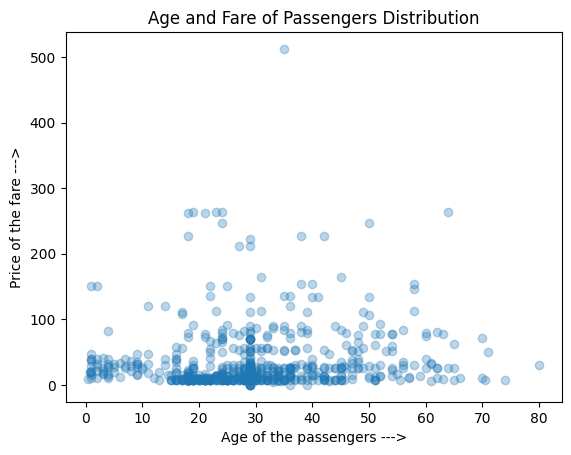

In [90]:
fig, ax = plt.subplots()
ax.scatter(X_train['Age'],X_train['Fare'], alpha=0.3)
ax.set_xlabel('Age of the passengers --->')
ax.set_ylabel('Price of the fare --->')
ax.title.set_text('Age and Fare of Passengers Distribution')
plt.show()

In [91]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,male,29.0,0,0,30.5000,S
1,3,female,27.0,0,2,11.1333,S
2,2,male,29.0,0,0,0.0000,S
3,3,female,9.0,4,2,31.2750,S
4,1,female,48.0,1,0,39.6000,C


In [92]:
high =  round(max(X_train['Fare']),2)
low = round(min(X_train['Fare']),2)
age_mean = round(X_train['Age'].mean(),2)
fare_mean = round(X_train['Fare'].mean(),2)
oldest_age = max(X_train['Age'])
print("The highest fare price is ${} and lowest fare price is ${}".format(high,low))
print("The mean value of Age is {} years and Fare is ${}".format(age_mean,fare_mean))
print("The age of the oldest passenge is {} years".format(oldest_age))

The highest fare price is $512.33 and lowest fare price is $0.0
The mean value of Age is 29.65 years and Fare is $32.66
The age of the oldest passenge is 80.0 years


2.	Only for this question use the df_train dataframe. Using matplotlib visualize the number of males and females that survived and their respective passenger classes on two separate bar chart plots using ‘matplotlib.pyplot.bar’ (Passenger Class column). <br>

In [93]:
df_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,male,29.0,0,0,30.5000,S,1
1,3,female,27.0,0,2,11.1333,S,1
2,2,male,29.0,0,0,0.0000,S,0
3,3,female,9.0,4,2,31.2750,S,0
4,1,female,48.0,1,0,39.6000,C,1


In [94]:
survived = df_train.loc[df_train['Survived']==1]

In [95]:
gender_male = survived.loc[survived['Sex']=='male']
gender_female = survived.loc[survived['Sex']=='female']

In [96]:
gm = pd.crosstab(gender_male['Sex'],survived['Pclass'])
gf = pd.crosstab(gender_female['Sex'],survived['Pclass'])

In [97]:
gm

Pclass,1,2,3
Sex,,,
male,42,15,38


In [98]:
gf

Pclass,1,2,3
Sex,,,
female,76,50,55


<AxesSubplot: title={'center': 'Male passengers class survived distribution'}, xlabel='PClass --->', ylabel='Male --->'>

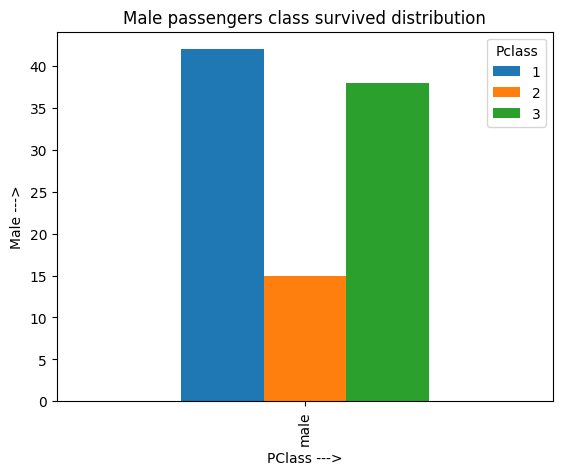

In [99]:
gm.plot(kind='bar',title='Male passengers class survived distribution',xlabel='PClass --->', ylabel='Male --->')

<AxesSubplot: title={'center': 'Female passengers class survived distribution'}, xlabel='PClass --->', ylabel='Female --->'>

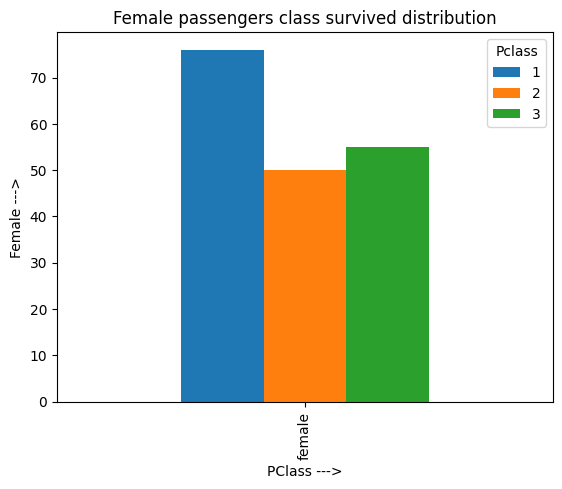

In [100]:
gf.plot(kind='bar',title='Female passengers class survived distribution',xlabel='PClass --->', ylabel='Female --->')

<AxesSubplot: title={'center': 'Passengers class survived distribution'}, xlabel='Sex --->', ylabel='Counts --->'>

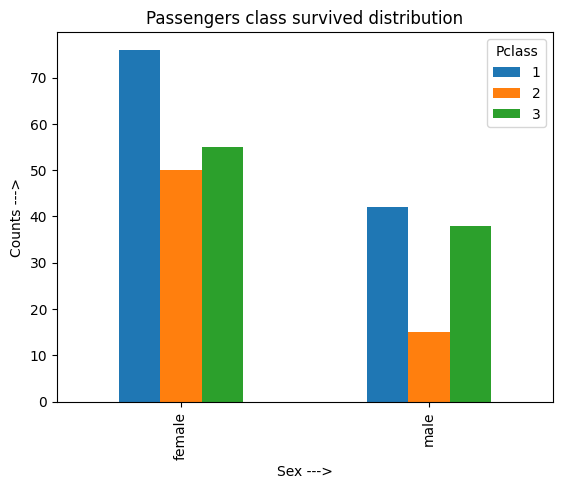

In [101]:
ct = pd.crosstab(survived['Sex'],survived['Pclass'])
ct.plot(kind='bar',title='Passengers class survived distribution',xlabel='Sex --->', ylabel='Counts --->')

In [102]:
ct

Pclass,1,2,3
Sex,,,
female,76,50,55
male,42,15,38


a.	Which class of passengers had the least number of survived males and how many? Repeat this analysis for females.

In [103]:
g = survived.loc[survived['Pclass']==2]
print("Class {} of passengers had the least number of survived males and that is {}".format(g['Pclass'].iloc[0],g['Sex'].value_counts()['male']))

Class 2 of passengers had the least number of survived males and that is 15


**Ans2.ii.2.a:** Class 2 of passengers had the least number of survived males and that is 15

In [104]:
g = survived.loc[survived['Pclass']==2]
print("Class {} of passengers had the least number of survived females and that is {}".format(g['Pclass'].iloc[0],g['Sex'].value_counts()['female']))

Class 2 of passengers had the least number of survived females and that is 50


**Ans2.ii.2.a:** Class 2 of passengers had the least number of survived females and that is 50

b.	Which class of passengers  had the greatest number of survived males and how many? Repeat this for females. 

In [105]:
g = survived.loc[survived['Pclass']==1]
print("Class {} of passengers had the greatest number of survived males and that is {}".format(g['Pclass'].iloc[0],g['Sex'].value_counts()['male']))

Class 1 of passengers had the greatest number of survived males and that is 42


**Ans2.ii.2.b:** Class 1 of passengers had the greatest number of survived males and that is 42

In [106]:
g = survived.loc[survived['Pclass']==1]
print("Class {} of passengers had the greatest number of survived females and that is {}".format(g['Pclass'].iloc[0],g['Sex'].value_counts()['female']))

Class 1 of passengers had the greatest number of survived females and that is 76


**Ans2.ii.2.b:** Class 1 of passengers had the greatest number of survived females and that is 76

3.	Using the Target variable (Survived) in y_train plot a bar chart showing the distribution of the ‘Survived’ column.

In [107]:
y_train

0      1
1      1
2      0
3      0
4      1
      ..
707    0
708    0
709    1
710    0
711    0
Name: Survived, Length: 712, dtype: int64

In [108]:
sc = pd.crosstab(y_train,y_train)
sc

Survived,0,1
Survived,,
0,436,0
1,0,276


<AxesSubplot: title={'center': 'Survived distribution'}, xlabel='Survived --->', ylabel='Counts --->'>

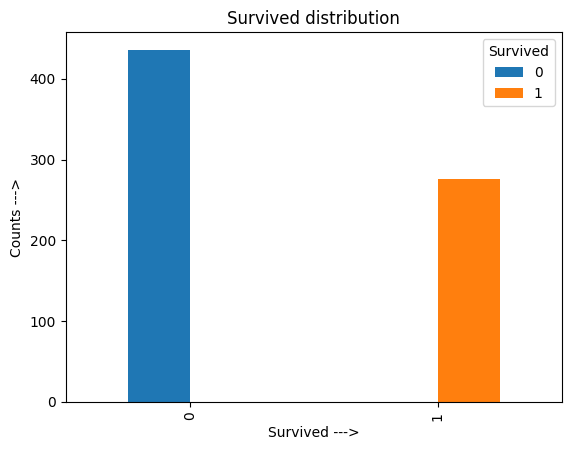

In [109]:
sc.plot(kind='bar',title='Survived distribution',xlabel='Survived --->', ylabel='Counts --->')

a.	What initial comment can you make about this distribution in terms of the frequency of each class? 

**Ans2.ii.3.a:** Initial comment is it shows that class 0 has more frequency than class 1 which means majority of passengers couldn't survived.

4.	So far you should have successfully been able to load, preprocess and visualize your data. Use the ‘pd.get_dummies()’ function to convert categorical data into dummy variables  (‘Sex’ and ‘Embarked’). (Perform this only on X_train store the result back into X_train ).

In [110]:
X_train = pd.get_dummies(X_train, columns=['Sex','Embarked'],drop_first=True)

a.	What is the new shape of X?

In [111]:
X_train.shape

(712, 8)

**Ans2.ii.4.a:** The new shape of X is (712, 8)

**iii. Data Scaling (2 points)**

1.	Employ X_train and MinMaxScaler only on the continuous attributes. Employ the ‘fit_transform()’ function of the scaler to retrieve the new (scaled) version of the data. Store the scaled values in X_train again.

In [112]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)

2. Scale the X_test using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into X_test.  At the end of this step, you must have X_train, X_test, all scaled according to the MinMaxScaler.

In [113]:
X_test = minmax.transform(X_test)

**c. Modelling (10 points)**

i.	(2 points) Modelling (Model Instantiation / Training) using Logistic Regression classifier

1.	Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr’

In [114]:
model_lr = LogisticRegression()

2.	Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [115]:
model_lr.fit(X_train,y_train)

LogisticRegression()

3.	Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [116]:
y_pred_lr = model_lr.predict(X_test)

4.	Employ the ‘accuracy_score ’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model.

In [117]:
print("Accuracy: ",accuracy_score(y_test, y_pred_lr))

Accuracy:  0.888268156424581


**ii. (2 points) Modelling (Model Instantiation / Training) using Support Vector Machine Classifier**

1.	Employ the Support Vector Machine (SVM) classifier from sklearn () and instantiate the model. Label this model as ‘model_svm’

In [118]:
model_svm = SVC()

2.	Once instantiated, ‘fit()’ the model using the scaled X_train, y_train data.

In [119]:
model_svm.fit(X_train,y_train)

SVC()

3.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_svm’. 

In [120]:
y_pred_svm = model_svm.predict(X_test)

4.	Employ the ‘accuracy_score’  function by using the ‘y_pred_svm’ and ‘y_test’ variables as the functions parameters and print the accuracy of the SVM model.and print the accuracy of the SVM model.

In [121]:
print("Accuracy: ", accuracy_score(y_test,y_pred_svm))

Accuracy:  0.8659217877094972


iii.	(3 points) Modelling Logistic Regression Classifier with the addition of noise on the target variable. In the data repository you should see three noisy datasets – ‘df_train_noise20’, ‘df_train_40’, ‘df_train_60’. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in df_train_noise20, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test’). 
Load the 'df_train_noise<nl>' (nl means noise level and is a place holder for the integer percentage) datasets and split the data into X_train_<nl> and y_train_<nl> (e.g., if working with `df_train_noise20’ we would split the data and store it in variables named X_train_20, y_train_20). ‘X_train_<nl>’ should store the features and ‘y_train_<nl>’ should store the target variable.

Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise level datasets.  
Train a new Logistic Regression model on the new training and use the pre-existing X_test and y_test to evaluate your model. Label this model as ‘model_lr_noise_<nl>’. Specifically, do the following:


In [122]:
df_train_noise20 = pd.read_csv('df_train_noise20.csv')
df_train_noise40 = pd.read_csv('df_train_noise40.csv')
df_train_noise60 = pd.read_csv('df_train_noise60.csv')

In [123]:
X_train_20 = df_train_noise20.drop(columns=['Survived'])
y_train_20 = df_train_noise20['Survived']
X_train_40 = df_train_noise40.drop(columns=['Survived'])
y_train_40 = df_train_noise40['Survived']
X_train_60 = df_train_noise60.drop(columns=['Survived'])
y_train_60 = df_train_noise60['Survived']

1.	Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr_noise<nl>’

In [124]:
model_lr_noise20 = LogisticRegression()
model_lr_noise40 = LogisticRegression()
model_lr_noise60 = LogisticRegression()

2.	Once instantiated, ‘fit()’ the model using the X_train_<nl> and y_train_<nl> data.

In [125]:
model_lr_noise20.fit(X_train_20,y_train_20)
model_lr_noise40.fit(X_train_40,y_train_40)
model_lr_noise60.fit(X_train_60,y_train_60)

LogisticRegression()

3.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr_noise<nl>’. 

In [126]:
y_pred_lr_noise20 = model_lr_noise20.predict(X_test)
y_pred_lr_noise40 = model_lr_noise40.predict(X_test)
y_pred_lr_noise60 = model_lr_noise60.predict(X_test)

c:\Users\Janmejay Mohanty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Janmejay Mohanty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Janmejay Mohanty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


4.	Employ the ‘accuracy_score ’ function and print the accuracy of the new Logistic Regression model.

In [127]:
print('Accuracy of 20% noise data : ',accuracy_score(y_test,y_pred_lr_noise20))
print('Accuracy of 40% noise data : ',accuracy_score(y_test,y_pred_lr_noise40))
print('Accuracy of 60% noise data : ',accuracy_score(y_test,y_pred_lr_noise60))

Accuracy of 20% noise data :  0.8435754189944135
Accuracy of 40% noise data :  0.7653631284916201
Accuracy of 60% noise data :  0.6089385474860335


a.	What is your initial observation of the accuracy, is the accuracy higher or lower than that of the clean dataset?

In [128]:
df_train_clean = pd.read_csv('df_train_clean.csv')
df_train_clean.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,0.0,0.369337,0.000,0.000000,0.059532,1.0,0.0,1.0,1.0
1,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0,1.0
2,0.5,0.369337,0.000,0.000000,0.000000,1.0,0.0,1.0,0.0
3,1.0,0.107816,0.500,0.333333,0.061045,0.0,0.0,1.0,0.0
4,0.0,0.597889,0.125,0.000000,0.077294,0.0,0.0,0.0,1.0


In [129]:
X_train_clean = df_train_clean.drop(columns=['Survived'])
y_train_clean = df_train_clean['Survived']


In [130]:
model_lr_clean = LogisticRegression()
model_lr_clean.fit(X_train_clean,y_train_clean)
y_pred_lr_clean = model_lr_clean.predict(X_test)


c:\Users\Janmejay Mohanty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [131]:
print("Accuracy of clean dataset using Logistic Regression: ",accuracy_score(y_test,y_pred_lr_clean))

Accuracy of clean dataset using Logistic Regression:  0.888268156424581


**Ans2.c.iii.4.a:** The initial observation of the accuracy is that, all the three noisy data's accuracy is lower than that of the clean dataset accuracy.

iv.	(3 points) Modelling Support Vector Machine (SVM) Classifier with the addition of noise on the target variable. In the data repository you should see three noisy datasets – ‘df_train_noise20’, ‘df_train_40’, ‘df_train_60’. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in df_train_noise20, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test’). 
Load the 'df_train_noise<nl>' (nl means noise level and is a place holder for the integer percentage) datasets and split the data into X_train_<nl> and y_train_<nl> (e.g., if working with `df_train_noise20’ we would split the data and store it in variables named X_train_20, y_train_20). ‘X_train_<nl>’ should store the features and ‘y_train_<nl>’ should store the target variable.

Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise datasets.  
Train a new SVM classification model on the new training and use the pre-existing X_test and y_test to evaluate your model. Label this model as ‘model_svm_noise_<nl>’.  Specifically, do the following:

1.	Employ a new SVM classifier from sklearn and instantiate the model. Label this model as ‘model_svm_noise<nl>’

In [132]:
model_svm_noise20 = SVC()
model_svm_noise40 = SVC()
model_svm_noise60 = SVC()

2.	Once instantiated, ‘fit()’ the model using the X_train_<nl> and y_train_<nl> data.

In [133]:
model_svm_noise20.fit(X_train_20,y_train_20)
model_svm_noise40.fit(X_train_40,y_train_40)
model_svm_noise60.fit(X_train_60,y_train_60)

SVC()

3.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_svm_noise<nl>’. 

In [134]:
y_pred_svm_noise20 = model_svm_noise20.predict(X_test)
y_pred_svm_noise40 = model_svm_noise40.predict(X_test)
y_pred_svm_noise60 = model_svm_noise60.predict(X_test)

c:\Users\Janmejay Mohanty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Janmejay Mohanty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Janmejay Mohanty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


4.	Employ the ‘accuracy_score ’ function and print the accuracy of the new Logistic Regression model.

In [135]:
print('Accuracy of 20% noise data : ',accuracy_score(y_test,y_pred_svm_noise20))
print('Accuracy of 40% noise data : ',accuracy_score(y_test,y_pred_svm_noise40))
print('Accuracy of 60% noise data : ',accuracy_score(y_test,y_pred_svm_noise60))

Accuracy of 20% noise data :  0.8324022346368715
Accuracy of 40% noise data :  0.8547486033519553
Accuracy of 60% noise data :  0.6312849162011173


a.	What is your initial observation of the accuracy, is the accuracy higher or lower than that of the clean dataset?

In [136]:
model_svm_clean = SVC()
model_svm_clean.fit(X_train_clean,y_train_clean)
y_pred_svm_clean = model_svm_clean.predict(X_test)

c:\Users\Janmejay Mohanty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [137]:
print("Accuracy of clean dataset using SVM: ",accuracy_score(y_test,y_pred_svm_clean))

Accuracy of clean dataset using SVM:  0.8659217877094972


**Ans2.c.iv.4.a:** The initial observation of the accuracy is that, all the three noisy data's accuracy is lower than that of the clean dataset accuracy.

**d. Evaluation (5 points)**

i.	(3 points) Report F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)

1.	Employ a `classification_report()` function from sklearn.metrics to report the precision recall and f1 score for each class for the ‘model_lr’ model and the ‘model_svm ’ along with a confusion matrix for each of them. 

In [138]:
print("model_lr")
print("Classification Report:")
print(classification_report(y_test,y_pred_lr,target_names=['class 0', 'class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_lr))

model_lr
Classification Report:
              precision    recall  f1-score   support

     class 0       0.90      0.93      0.91       113
     class 1       0.87      0.82      0.84        66

    accuracy                           0.89       179
   macro avg       0.88      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179

Confusion Matrix:
[[105   8]
 [ 12  54]]


In [139]:
print("model_svm")
print("Classification Report:")
print(classification_report(y_test,y_pred_svm,target_names=['class 0', 'class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_svm))

model_svm
Classification Report:
              precision    recall  f1-score   support

     class 0       0.83      0.98      0.90       113
     class 1       0.96      0.67      0.79        66

    accuracy                           0.87       179
   macro avg       0.90      0.82      0.84       179
weighted avg       0.88      0.87      0.86       179

Confusion Matrix:
[[111   2]
 [ 22  44]]


ii.	(2 points) Report the accuracy and classification report for each of the three noisy models  (model_lr_noise<nl>, model_svm_noise<nl>).

In [140]:
print("model_lr_noise20")
print("Classification Report:")
print(classification_report(y_test,y_pred_lr_noise20,target_names=['class 0', 'class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_lr_noise20))

model_lr_noise20
Classification Report:
              precision    recall  f1-score   support

     class 0       0.85      0.92      0.88       113
     class 1       0.84      0.71      0.77        66

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
[[104   9]
 [ 19  47]]


In [141]:
print("model_lr_noise40")
print("Classification Report:")
print(classification_report(y_test,y_pred_lr_noise40,target_names=['class 0', 'class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_lr_noise40))

model_lr_noise40
Classification Report:
              precision    recall  f1-score   support

     class 0       0.74      0.97      0.84       113
     class 1       0.90      0.41      0.56        66

    accuracy                           0.77       179
   macro avg       0.82      0.69      0.70       179
weighted avg       0.80      0.77      0.74       179

Confusion Matrix:
[[110   3]
 [ 39  27]]


In [142]:
print("model_lr_noise60")
print("Classification Report:")
print(classification_report(y_test,y_pred_lr_noise60,target_names=['class 0', 'class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_lr_noise60))

model_lr_noise60
Classification Report:
              precision    recall  f1-score   support

     class 0       0.68      0.73      0.70       113
     class 1       0.47      0.41      0.44        66

    accuracy                           0.61       179
   macro avg       0.57      0.57      0.57       179
weighted avg       0.60      0.61      0.60       179

Confusion Matrix:
[[82 31]
 [39 27]]


In [143]:
print("model_svm_noise20")
print("Classification Report:")
print(classification_report(y_test,y_pred_svm_noise20,target_names=['class 0', 'class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_svm_noise20))

model_svm_noise20
Classification Report:
              precision    recall  f1-score   support

     class 0       0.79      1.00      0.88       113
     class 1       1.00      0.55      0.71        66

    accuracy                           0.83       179
   macro avg       0.90      0.77      0.79       179
weighted avg       0.87      0.83      0.82       179

Confusion Matrix:
[[113   0]
 [ 30  36]]


In [144]:
print("model_svm_noise40")
print("Classification Report:")
print(classification_report(y_test,y_pred_svm_noise40,target_names=['class 0', 'class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_svm_noise40))

model_svm_noise40
Classification Report:
              precision    recall  f1-score   support

     class 0       0.82      0.98      0.90       113
     class 1       0.95      0.64      0.76        66

    accuracy                           0.85       179
   macro avg       0.89      0.81      0.83       179
weighted avg       0.87      0.85      0.85       179

Confusion Matrix:
[[111   2]
 [ 24  42]]


In [145]:
print("model_svm_noise60")
print("Classification Report:")
print(classification_report(y_test,y_pred_svm_noise60,target_names=['class 0', 'class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_svm_noise60))

model_svm_noise60
Classification Report:
              precision    recall  f1-score   support

     class 0       0.67      0.81      0.74       113
     class 1       0.50      0.32      0.39        66

    accuracy                           0.63       179
   macro avg       0.59      0.57      0.56       179
weighted avg       0.61      0.63      0.61       179

Confusion Matrix:
[[92 21]
 [45 21]]


**e. Discussion (8 points)**

i.	(4 points) Compare the performance of the Logistic Regression (model_lr) classifier and the SVM classifier (model_svm) trained on the clean training data sets. Using the classification reports which model performs better? Mention the specific numbers (i.e., from your results calculating the precision, recall, F1 score) in a table.

**Ans2.e.1:** 

| Model Name  | Class  | Precision  | Recall  | F1  |
|---|---|---|---|---|
| model_lr  | 0  | 0.90  | 0.93  | 0.91  |
| model_lr  | 1  | 0.87  | 0.82  | 0.84  |
| model_svm  | 0  | 0.83  | 0.98  | 0.90  |
| model_svm  | 1  | 0.96  | 0.67  |  0.79 |

From the above table and classification reports we can conclude that overall performance of Logistic Regression (model_lr) classifier is better than SVM classifier (model_svm) trained on the clean training data sets. <br>
Accuracy of model_lr 0.89 > Accuracy of model_svm 0.87<br>
Class 0 of model_lr Precision 0.90 > Class 0 of model_svm Precision 0.83<br>
Class 0 of model_lr F1 0.91 > Class 0 of model_svm F1 0.90<br>
Class 1 of model_lr Recall 0.82 > Class 1 of model_svm Recall 0.67<br>
Class 1 of model_lr F1 0.84 > Class 1 of model_svm F1 0.79<br>
Class 0 of model_lr Recall 0.93 < Class 0 of model_svm Recall 0.98<br>
Class 1 of model_lr Precision 0.87 < Class 1 of model_svm Precision 0.96<br>
Here only in two cases model_svm metrics score are more than model_lr metrics score but majority the model_lr metrics score are more than model_svm metrics.

ii.	(4 points) Report the performance of all the classification models you have trained thus far in terms of (precision, recall, F1 scores). From the results of the three noisy models implemented using Logistic Regression. What did you notice about the accuracy as the noise of the dataset increased? What can you say about the effect of noise on data mining pipelines?

**Ans2.e.ii:**

| Model Name  | Class  | Precision  | Recall  | F1  |
|---|---|---|---|---|
| model_lr  | Not Survived  | 0.90  | 0.93  | 0.91  |
| model_lr  | Survived  | 0.87  | 0.82  | 0.84  |
| model_lr_noise20  | Not Survived  | 0.85  | 0.92  | 0.88  |
| model_lr_noise20  | Survived  | 0.84  | 0.71  | 0.77  |
| model_lr_noise40  | Not Survived  | 0.74  | 0.97  | 0.84  |
| model_lr_noise40  | Survived  | 0.90  | 0.41  | 0.56  |
| model_lr_noise60  | Not Survived  | 0.68  | 0.73  | 0.70  |
| model_lr_noise60  | Survived  | 0.47  | 0.41  | 0.44  |
| model_svm  | Not Survived  | 0.83  | 0.98  | 0.90  |
| model_svm  | Survived  | 0.96  | 0.67  | 0.79  |
| model_svm_noise20  | Not Survived  | 0.79  | 1.00  | 0.88  |
| model_svm_noise20  | Survived  | 1.00  | 0.55  | 0.71  |
| model_svm_noise40  | Not Survived  | 0.82  | 0.98  | 0.90  |
| model_svm_noise40  | Survived  | 0.95  | 0.64  | 0.76  |
| model_svm_noise60  | Not Survived  | 0.67  | 0.81  | 0.74  |
| model_svm_noise60  | Survived  | 0.50  | 0.32  | 0.39  |

In [146]:
print('Accuracy of 20% noise data of model_lr_noise20 : ',accuracy_score(y_test,y_pred_lr_noise20))
print('Accuracy of 40% noise data of model_lr_noise40 : ',accuracy_score(y_test,y_pred_lr_noise40))
print('Accuracy of 60% noise data of model_lr_noise60 : ',accuracy_score(y_test,y_pred_lr_noise60))

Accuracy of 20% noise data of model_lr_noise20 :  0.8435754189944135
Accuracy of 40% noise data of model_lr_noise40 :  0.7653631284916201
Accuracy of 60% noise data of model_lr_noise60 :  0.6089385474860335


In [147]:
print('Accuracy of 20% noise data of model_svm_noise20 : ',accuracy_score(y_test,y_pred_svm_noise20))
print('Accuracy of 40% noise data of model_svm_noise40 : ',accuracy_score(y_test,y_pred_svm_noise40))
print('Accuracy of 60% noise data of model_svm_noise60 : ',accuracy_score(y_test,y_pred_svm_noise60))

Accuracy of 20% noise data of model_svm_noise20 :  0.8324022346368715
Accuracy of 40% noise data of model_svm_noise40 :  0.8547486033519553
Accuracy of 60% noise data of model_svm_noise60 :  0.6312849162011173


From the results of the three noisy models implemented using Logistic Regression, we notice that the accuracy is gradually decreased as the dataset noise increased. <br>
And from the results of the three noisy models implemented using Support Vector Machine, we notice that the accuracy is first increased and then decreased as the dataset noise increased. <br>
The effect of noise on data mining pipelines is that it unnecessarily increases the amount of storage space required and can also adversely affect the results of any data mining analysis such as change in accuracy score, increases the data processing time complexity and many more.
